# 0901AD211065_Vikram

In [1]:
import numpy as np
import pandas as pd
import re

In [2]:
df = pd.read_csv(r'C:\Users\Dell\Downloads\Compressed\archive_3\Titanic-Dataset.csv')

In [3]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df.shape

(891, 12)

In [6]:
df.drop(columns = ["PassengerId", "SibSp","Name","Cabin","Embarked","Parch","Ticket"], inplace = True)


In [7]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
Fare          0
dtype: int64

In [8]:
df

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500
...,...,...,...,...,...
886,0,2,male,27.0,13.0000
887,1,1,female,19.0,30.0000
888,0,3,female,NaN,23.4500
889,1,1,male,26.0,30.0000


In [9]:
df['Age'].fillna(value=df['Age'].mean(), inplace = True)

In [10]:
df = pd.get_dummies(df, columns =["Sex"], drop_first = True)


In [11]:
df = df.astype(int)

In [12]:
df

,Survived,Pclass,Age,Fare,Sex_male
0,0,3,22,7,1
1,1,1,38,71,0
2,1,3,26,7,0
3,1,1,35,53,0
4,0,3,35,8,1
...,...,...,...,...,...
886,0,2,27,13,1
887,1,1,19,30,0
888,0,3,29,23,0
889,1,1,26,30,1


In [13]:
df.isnull().sum()

Survived    0
Pclass      0
Age         0
Fare        0
Sex_male    0
dtype: int64

### Splitting the data into train and test data

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X = (df.iloc[:,1:5])
y = df["Survived"]

In [16]:
(X_train, X_test, y_train, y_test) = train_test_split(X, y, test_size = 0.2, random_state = 0)

### Implementing Logistic Regression 

In [17]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [18]:
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

In [19]:
model.fit(X_train, y_train)

LogisticRegression()

In [20]:
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt

In [21]:
correlation = df.corr()

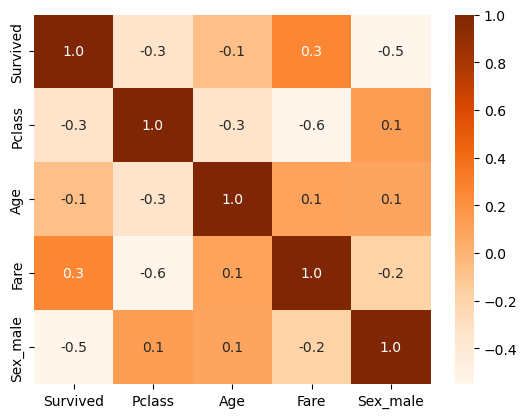

In [22]:
plt.figure()
sns.heatmap(correlation, fmt='.1f', annot= True, cmap= "Oranges")
plt.show()

In [23]:
#checking accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, y_train)

In [24]:
print('Accuracy on the training data : ', training_data_accuracy)

Accuracy on the training data :  0.7949438202247191


In [25]:
# checking accuracy on testing data
X_test_prediction = model.predict(X_test)
testing_data_accuracy = accuracy_score(X_test_prediction, y_test)

In [26]:
print('Accuracy on the testing data : ',testing_data_accuracy)

Accuracy on the testing data :  0.8100558659217877


In [27]:
accuracy = accuracy_score(y_test, X_test_prediction)
classification_report_result = classification_report(y_test, X_test_prediction)

In [28]:
auc = roc_auc_score(y_test, X_test_prediction)

In [29]:
print(f"Accuracy: {accuracy}")
print(f"AUC: {auc}")
print("Classification Report:")
print(classification_report_result)

Accuracy: 0.8100558659217877
AUC: 0.7968379446640316
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.85      0.85       110
           1       0.76      0.74      0.75        69

    accuracy                           0.81       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179

